In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
pd.reset_option('all')

/tmp/ipykernel_17/2786130087.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/tmp/ipykernel_17/2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
dfNull = df.isnull().sum()
dfNull = dfNull[dfNull > 0]
dfNull

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
df.isnull().sum().sum()

7829

In [8]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})
print(missing_data)

              Missing Ratio
PoolQC            99.520548
MiscFeature       96.301370
Alley             93.767123
Fence             80.753425
MasVnrType        59.726027
FireplaceQu       47.260274
LotFrontage       17.739726
GarageType         5.547945
GarageYrBlt        5.547945
GarageFinish       5.547945
GarageQual         5.547945
GarageCond         5.547945
BsmtFinType2       2.602740
BsmtExposure       2.602740
BsmtFinType1       2.534247
BsmtCond           2.534247
BsmtQual           2.534247
MasVnrArea         0.547945
Electrical         0.068493


In [9]:
train, test = train_test_split(df, test_size=0.2,random_state=42)

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,951.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,730.904966,56.849315,70.343849,10689.642123,6.121575,5.584760,1970.965753,1984.897260,103.771945,446.023973,...,95.946918,49.578767,21.839041,3.812500,15.407534,2.955479,51.267123,6.356164,2007.818493,181441.541952
std,425.369088,42.531862,24.897021,10759.366198,1.367619,1.116062,30.675495,20.733955,173.032238,459.070977,...,129.685939,69.433580,62.083227,31.519664,55.881148,41.648504,553.039684,2.670707,1.322639,77263.583862
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.750000,20.000000,59.000000,7587.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,732.500000,50.000000,70.000000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,384.500000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1101.750000,70.000000,80.000000,11700.000000,7.000000,6.000000,2001.000000,2004.000000,166.000000,721.000000,...,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214925.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,745000.000000


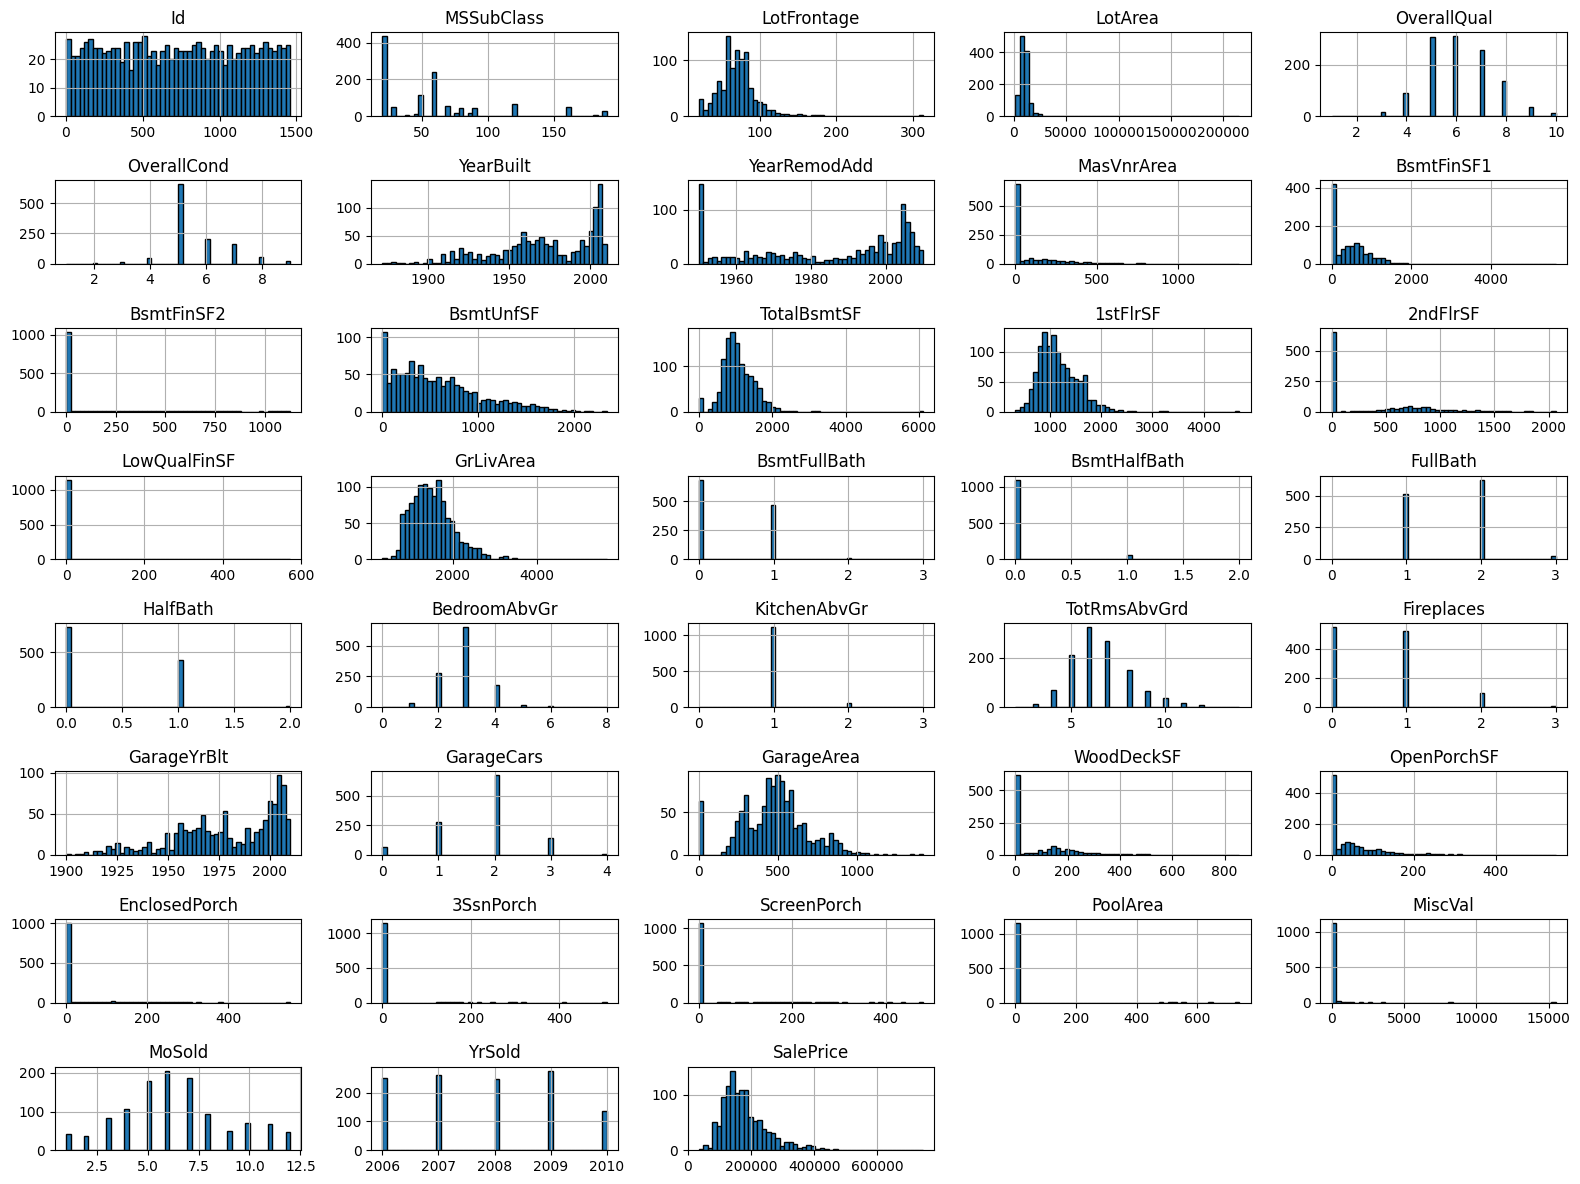

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


train.hist(bins=50, figsize=(16, 12), layout=(8, 5), edgecolor='black')
plt.tight_layout()
plt.show()

In [12]:
housing = train.copy()

In [13]:

numeric_cols = housing.select_dtypes(include=[float, int])


corr_matrix = numeric_cols.corr()


saleprice_corr = corr_matrix["SalePrice"].sort_values(ascending=False)
print(saleprice_corr)


SalePrice        1.000000
OverallQual      0.785555
GrLivArea        0.695652
GarageCars       0.640991
GarageArea       0.624139
TotalBsmtSF      0.597766
1stFlrSF         0.587883
FullBath         0.552546
TotRmsAbvGrd     0.520388
YearBuilt        0.516501
YearRemodAdd     0.508593
GarageYrBlt      0.480351
MasVnrArea       0.459123
Fireplaces       0.457549
BsmtFinSF1       0.359460
LotFrontage      0.330066
WoodDeckSF       0.329843
2ndFlrSF         0.314030
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
ScreenPorch      0.119172
PoolArea         0.115630
3SsnPorch        0.051532
MoSold           0.041890
BsmtFinSF2      -0.005731
YrSold          -0.009099
LowQualFinSF    -0.011189
Id              -0.019643
MiscVal         -0.020179
BsmtHalfBath    -0.048346
OverallCond     -0.074391
MSSubClass      -0.088081
KitchenAbvGr    -0.142785
EnclosedPorch   -0.149532
Name: SalePr

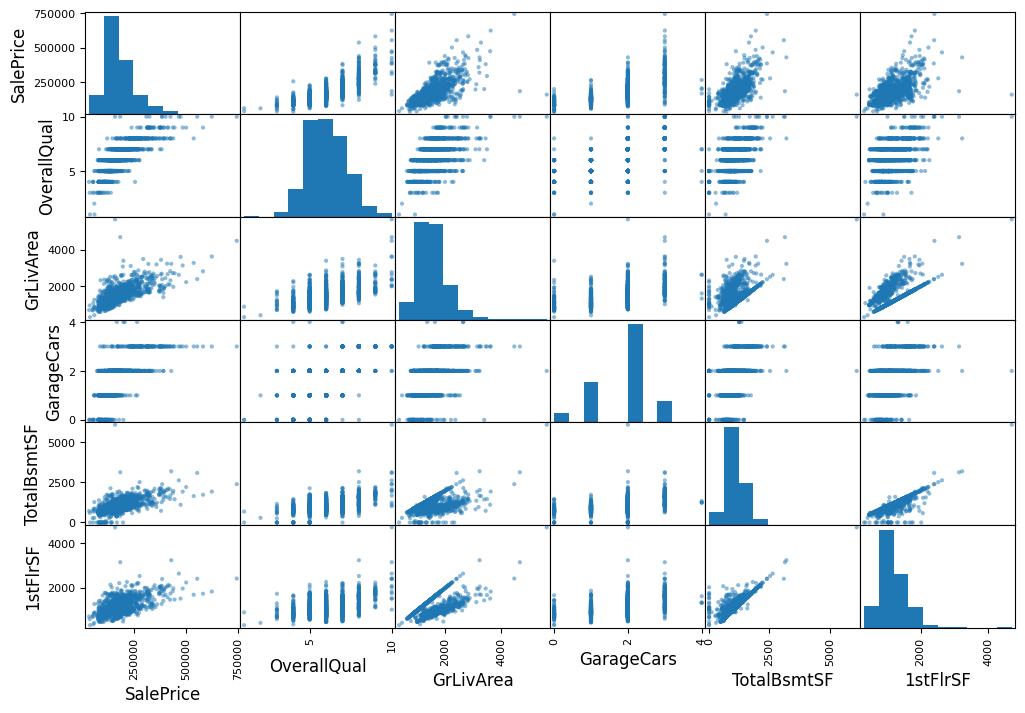

In [14]:
from pandas.plotting import scatter_matrix


attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "1stFlrSF"]


scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

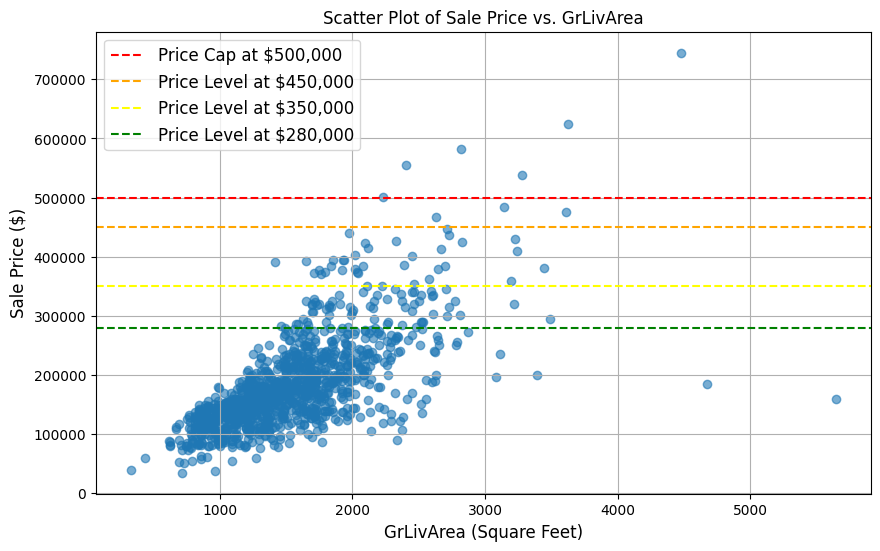

In [15]:


plt.figure(figsize=(10, 6))
plt.scatter(housing['GrLivArea'], housing['SalePrice'], alpha=0.6)  # استبدل 'SalePrice' بالعمود المناسب للسعر
plt.title('Scatter Plot of Sale Price vs. GrLivArea')
plt.xlabel('GrLivArea (Square Feet)')
plt.ylabel('Sale Price ($)')
plt.axhline(y=500000, color='r', linestyle='--', label='Price Cap at $500,000')
plt.axhline(y=450000, color='orange', linestyle='--', label='Price Level at $450,000')
plt.axhline(y=350000, color='yellow', linestyle='--', label='Price Level at $350,000')
plt.axhline(y=280000, color='green', linestyle='--', label='Price Level at $280,000')
plt.legend()
plt.grid()
plt.show()


In [16]:
housing["houseSize"] = test["houseSize"] = housing["GrLivArea"] + housing["TotalBsmtSF"]

housing["HouseAge"] = test["HouseAge"] = housing["YrSold"] - housing["YearBuilt"]

housing["RoomsNumbers"] = test["RoomsNumbers"] = housing["HalfBath"] + housing["BedroomAbvGr"] + housing["FullBath"]

housing["OverAllQualtiy"] = test["OverAllQualtiy"] = housing["OverallQual"] + housing["OverallCond"]

housing["Entertainment_Features"] = test["Entertainment_Features"] = housing["PoolArea"] + housing["Fireplaces"] + housing["WoodDeckSF"]


In [17]:
housing.shape

(1168, 86)

In [18]:
test.shape

(292, 86)

In [19]:
new_features = ["houseSize", "HouseAge", "RoomsNumbers", "OverAllQualtiy", "Entertainment_Features"]
housing[new_features].head()

,houseSize,HouseAge,RoomsNumbers,OverAllQualtiy,Entertainment_Features
254,2628,53,4,11,250
1066,2370,16,6,13,1
638,1592,98,3,12,328
799,2499,70,5,12,2
380,2717,86,5,11,1


In [20]:

numeric_housing = housing.select_dtypes(include=['float64', 'int64'])


corr_matrix = numeric_housing.corr()

corr_matrix["SalePrice"].sort_values(ascending=False)


SalePrice                 1.000000
OverallQual               0.785555
houseSize                 0.763242
GrLivArea                 0.695652
GarageCars                0.640991
GarageArea                0.624139
TotalBsmtSF               0.597766
1stFlrSF                  0.587883
OverAllQualtiy            0.587352
FullBath                  0.552546
TotRmsAbvGrd              0.520388
YearBuilt                 0.516501
YearRemodAdd              0.508593
GarageYrBlt               0.480351
MasVnrArea                0.459123
Fireplaces                0.457549
RoomsNumbers              0.429982
BsmtFinSF1                0.359460
Entertainment_Features    0.343821
LotFrontage               0.330066
WoodDeckSF                0.329843
2ndFlrSF                  0.314030
OpenPorchSF               0.299969
HalfBath                  0.280481
LotArea                   0.266204
BsmtFullBath              0.226346
BsmtUnfSF                 0.222487
BedroomAbvGr              0.156211
ScreenPorch         

In [21]:
y_train = housing["SalePrice"].copy()
x_train = housing.drop("SalePrice", axis=1)

In [22]:
y_test = test["SalePrice"].copy()
x_test = test.drop("SalePrice", axis=1)

In [23]:
trainNull = x_train.isnull().sum()
trainNull = trainNull[trainNull > 0]
trainNull

LotFrontage      217
Alley           1094
MasVnrType       683
MasVnrArea         6
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1162
Fence            935
MiscFeature     1122
dtype: int64

In [24]:
all_data_na = (x_train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})
print(missing_data)

              Missing Ratio
PoolQC            99.486301
MiscFeature       96.061644
Alley             93.664384
Fence             80.051370
MasVnrType        58.476027
FireplaceQu       46.832192
LotFrontage       18.578767
GarageType         5.479452
GarageYrBlt        5.479452
GarageFinish       5.479452
GarageQual         5.479452
GarageCond         5.479452
BsmtFinType1       2.397260
BsmtFinType2       2.397260
BsmtExposure       2.397260
BsmtCond           2.397260
BsmtQual           2.397260
MasVnrArea         0.513699
Electrical         0.085616


In [25]:
numerical  = x_train.select_dtypes(include=[np.number])
numericalNull = pd.DataFrame(numerical).isnull().sum()
numericalNull = numericalNull[numericalNull > 0]
numericalNull

LotFrontage    217
MasVnrArea       6
GarageYrBlt     64
dtype: int64

In [26]:
x_train.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1, inplace=True)
x_test.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1, inplace=True)

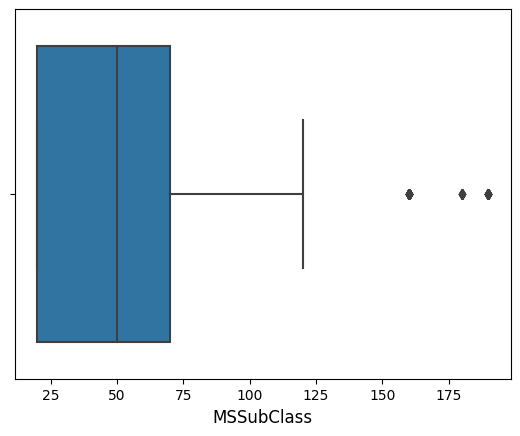

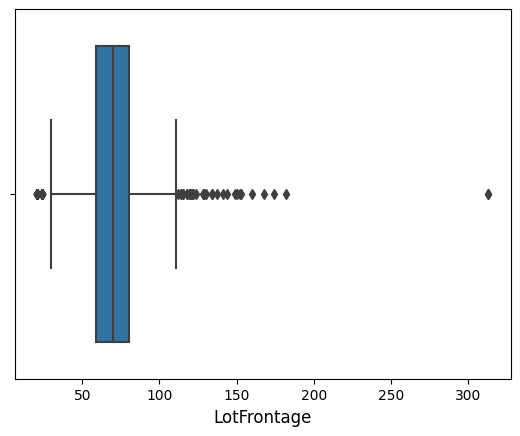

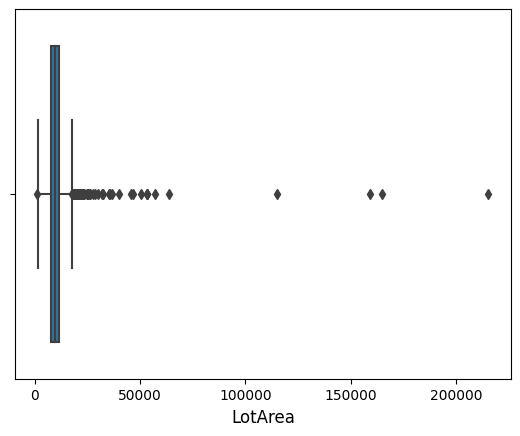

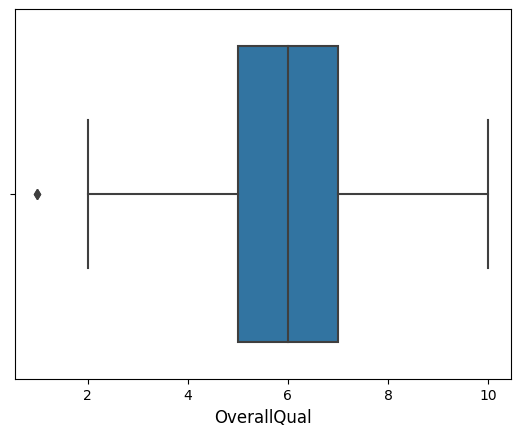

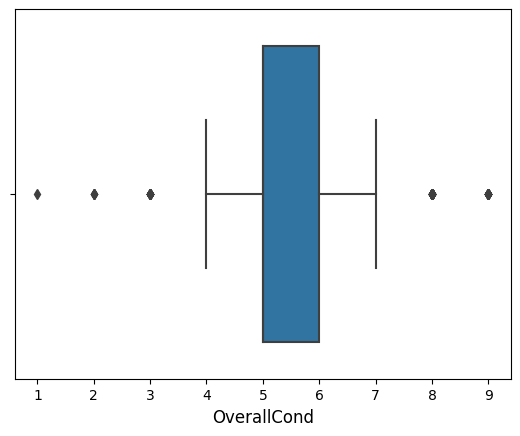

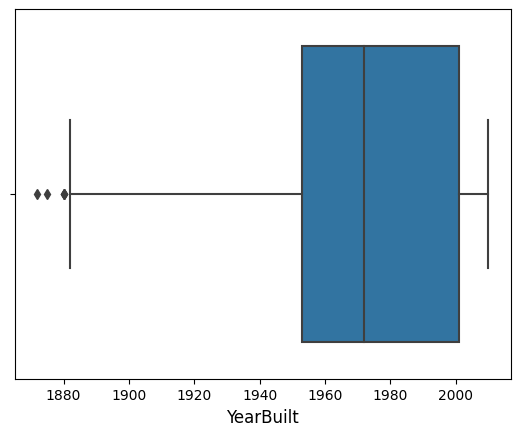

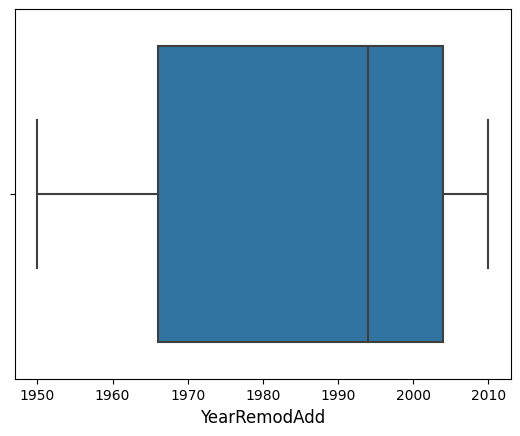

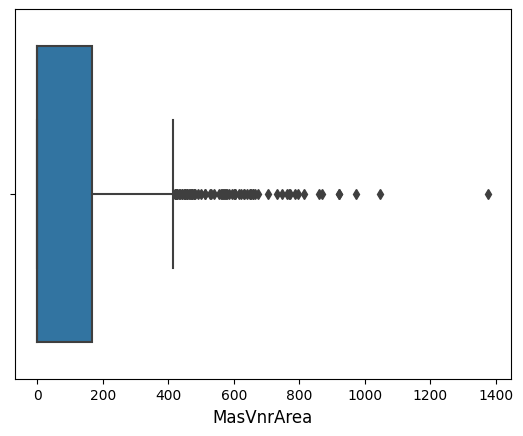

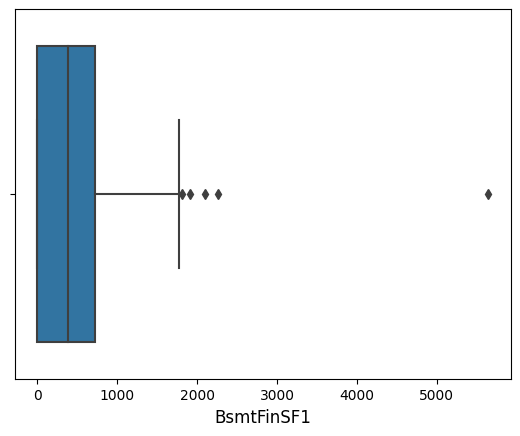

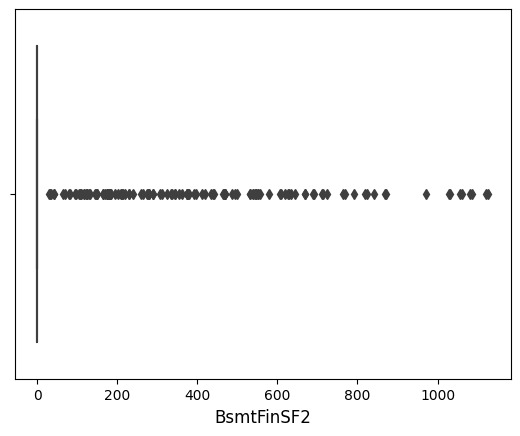

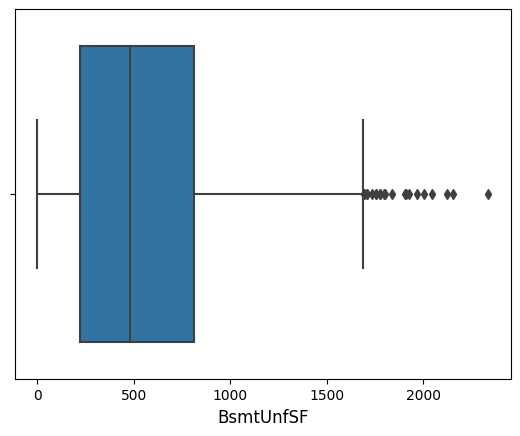

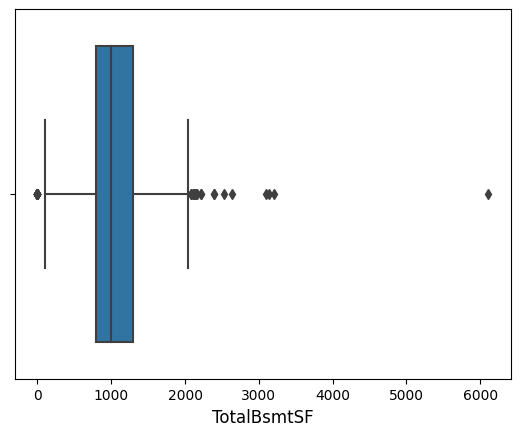

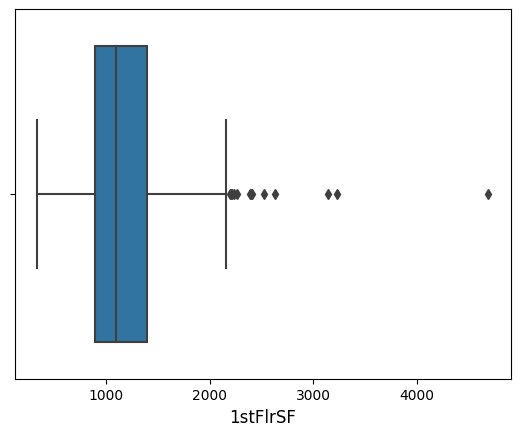

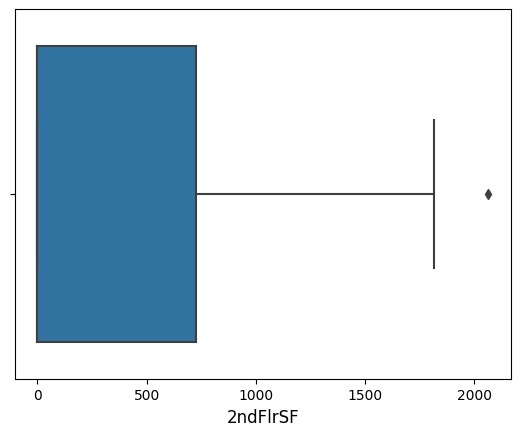

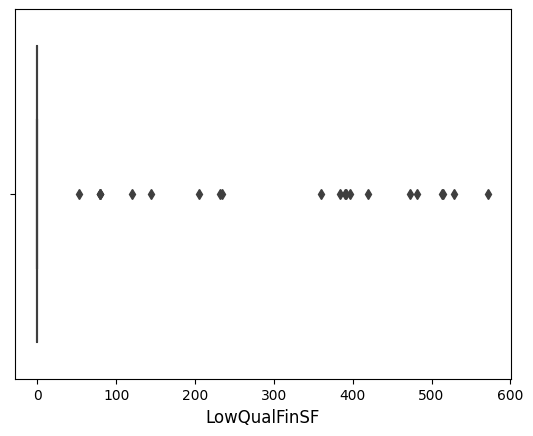

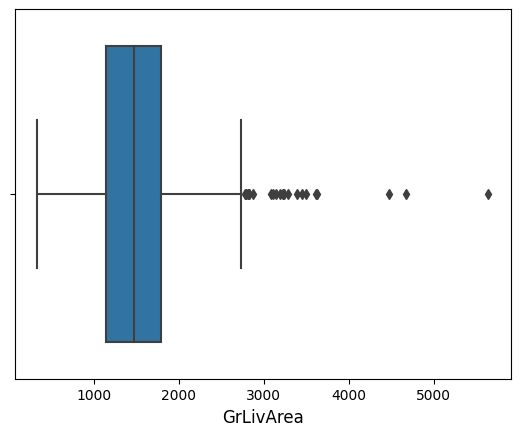

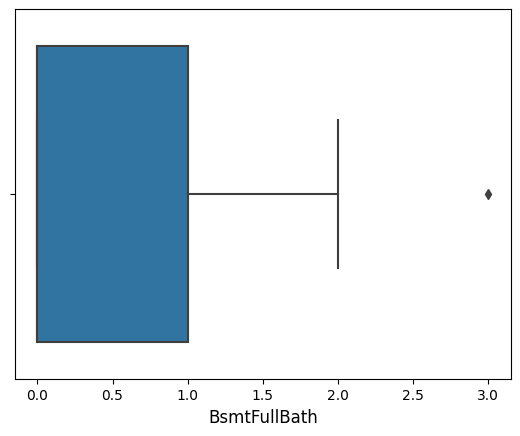

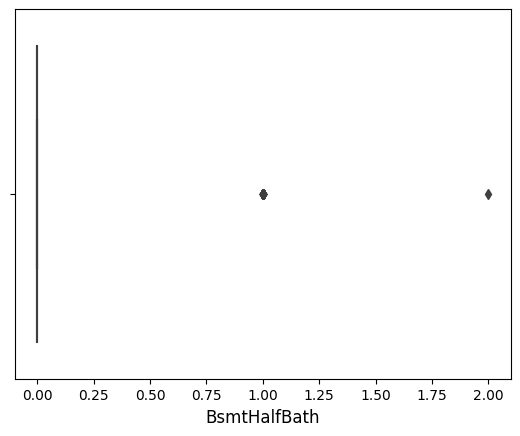

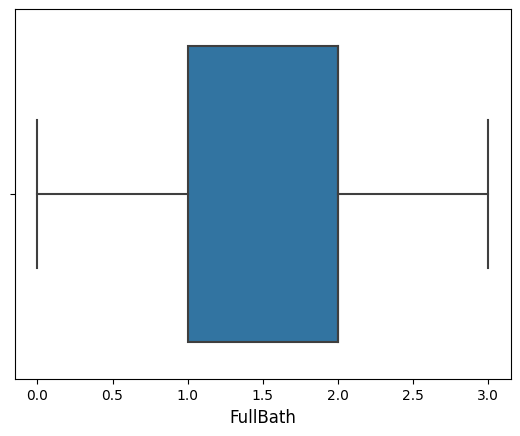

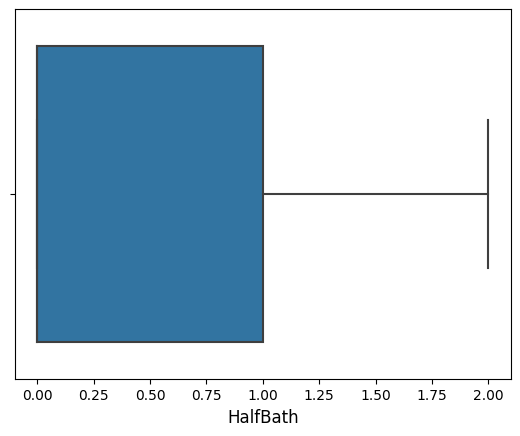

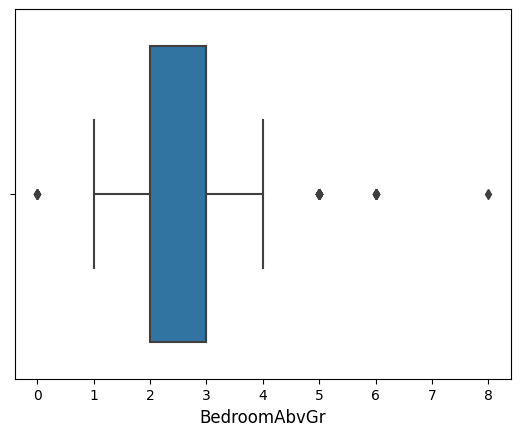

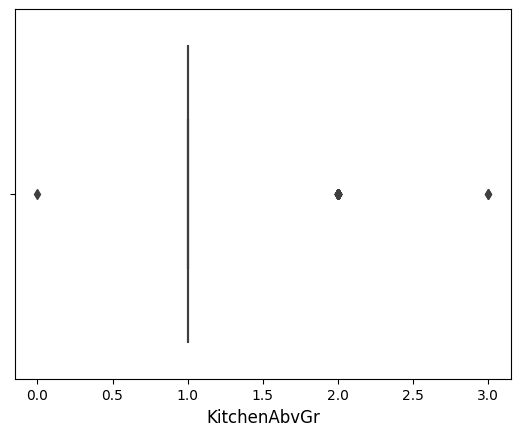

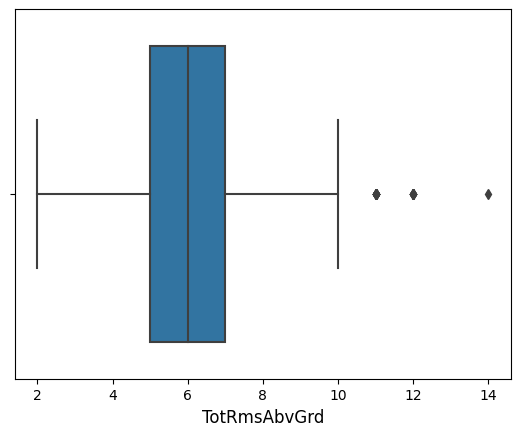

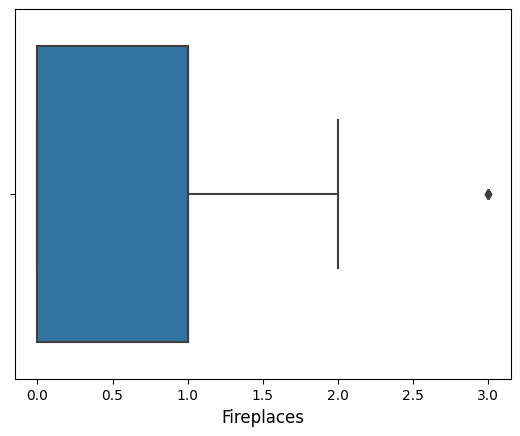

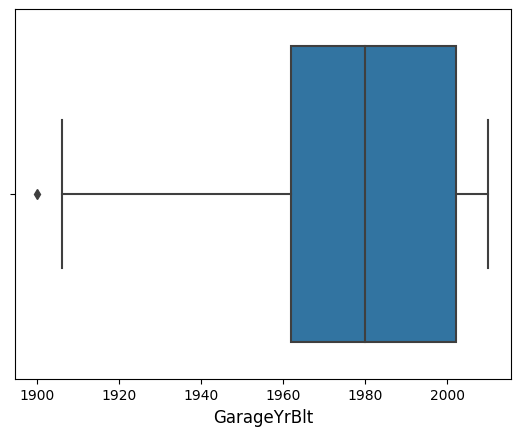

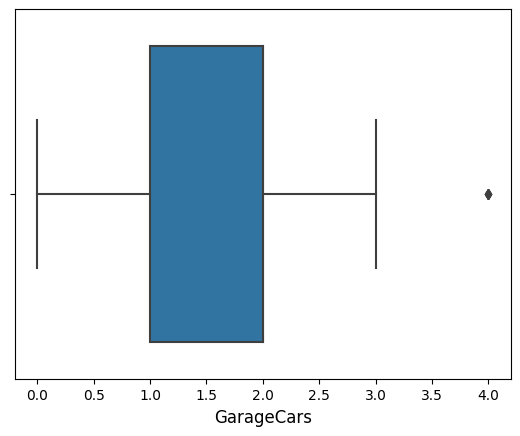

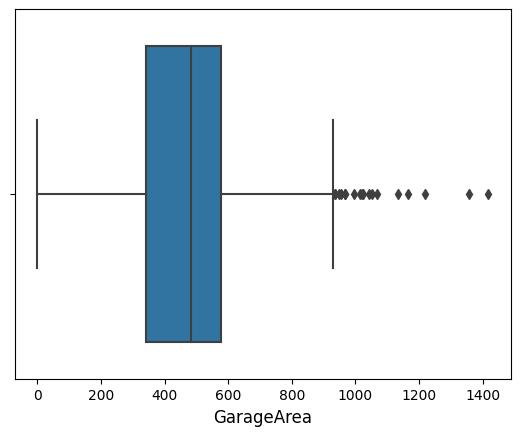

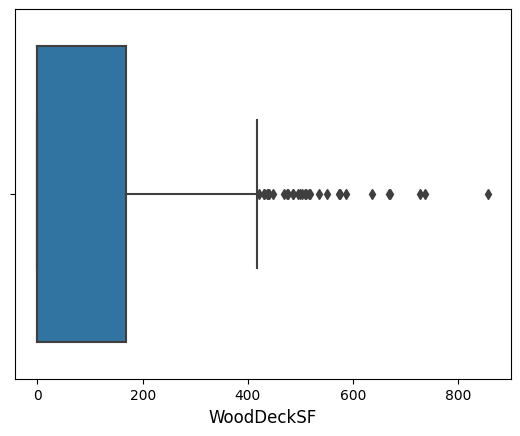

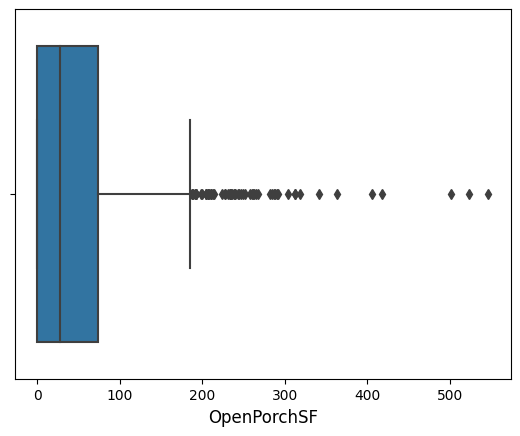

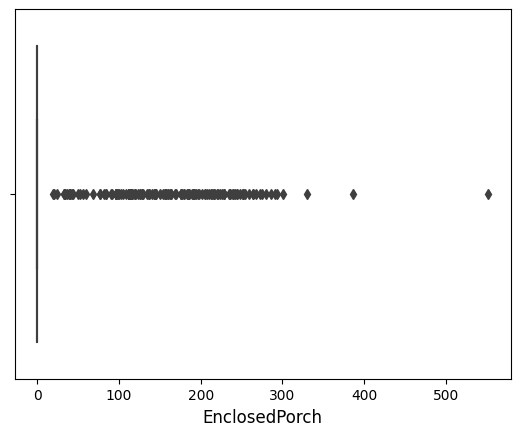

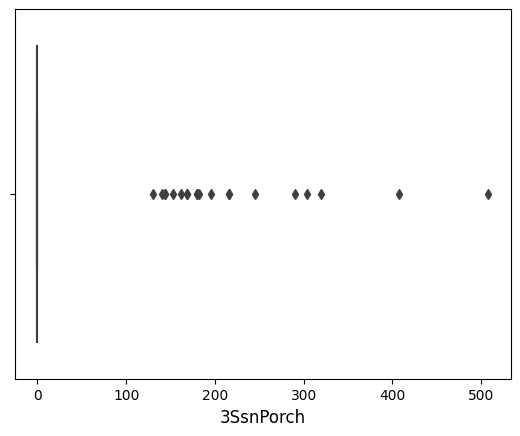

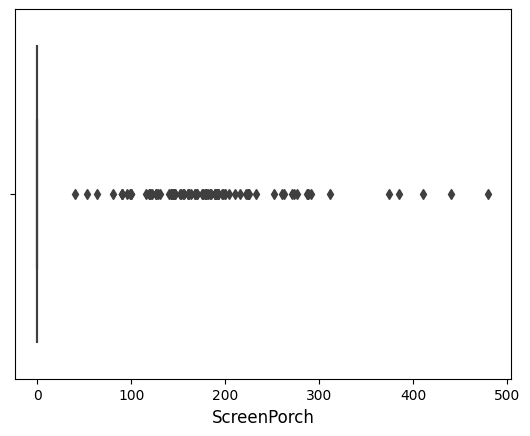

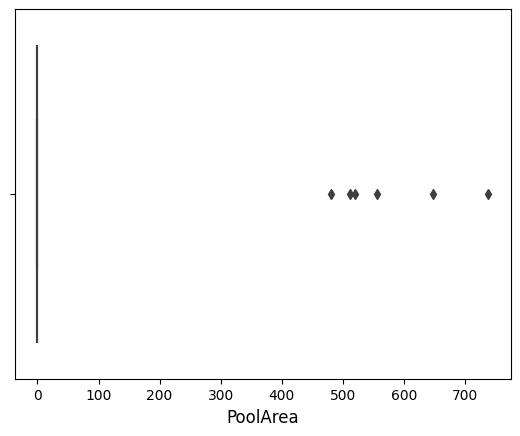

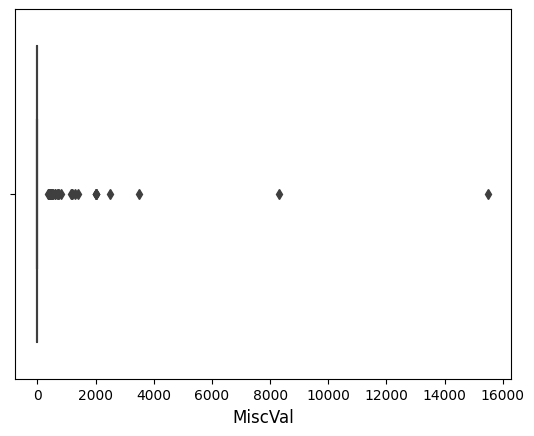

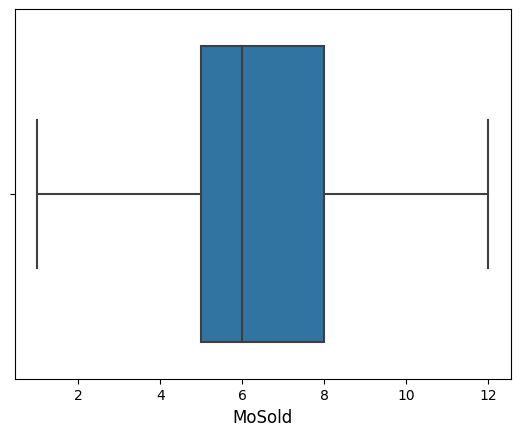

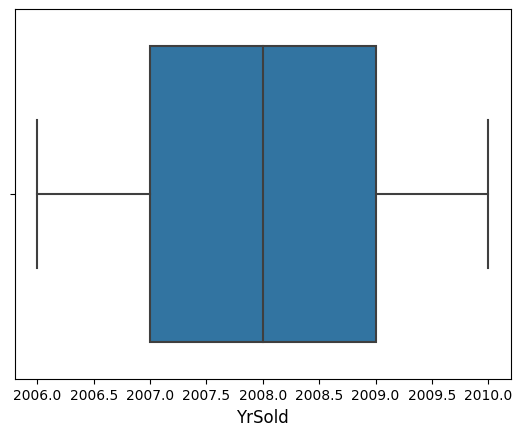

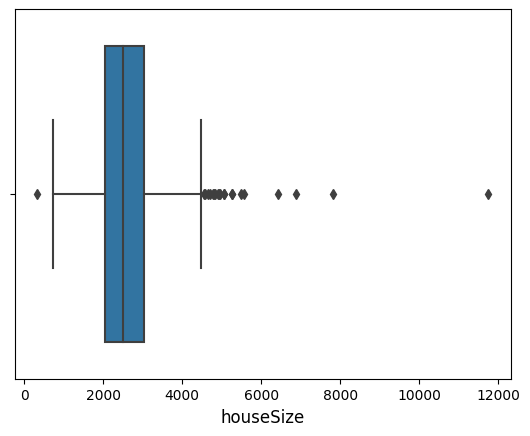

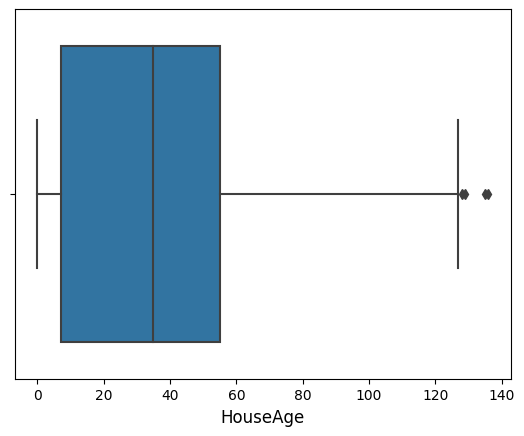

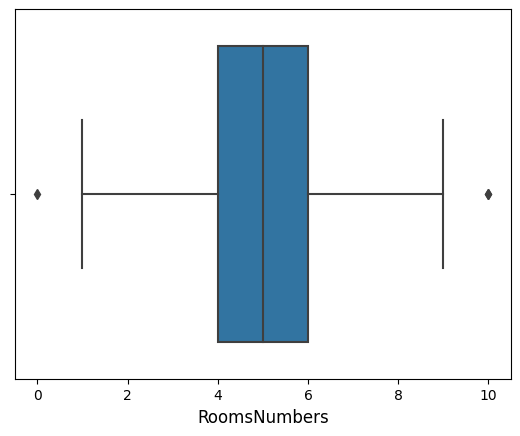

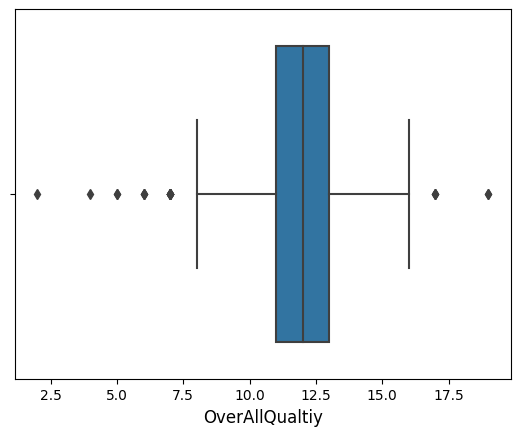

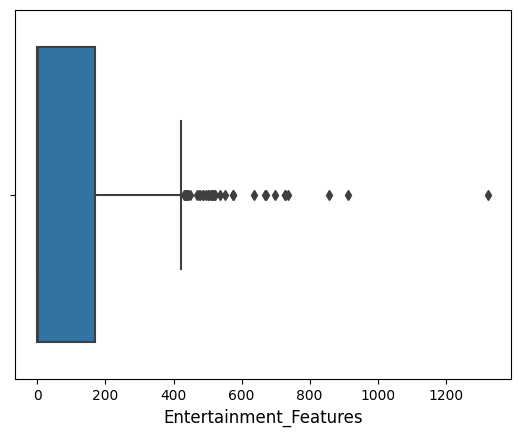

In [27]:
for i in x_train.select_dtypes(include="number").columns:
    sns.boxplot(data=x_train, x=i)
    plt.show()

In [28]:
sample_incomplete_rows = x_train[x_train.isnull().any(axis=1)].head()
sample_incomplete_rows

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,houseSize,HouseAge,RoomsNumbers,OverAllQualtiy,Entertainment_Features
638,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,5,2008,WD,Normal,1592,98,3,12,328
221,60,RL,NaN,8068,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,12,2009,ConLI,Normal,3277,7,7,11,121
113,20,RL,NaN,21000,Pave,Reg,Bnk,AllPub,Corner,Gtl,...,0,10,2007,COD,Abnorml,4068,54,5,11,168
936,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,8,2009,WD,Normal,2376,6,4,12,0
342,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,5,2006,WD,Normal,1040,57,4,7,0


In [29]:
housing_num = x_train.select_dtypes(include=[np.number])
housing_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,houseSize,HouseAge,RoomsNumbers,OverAllQualtiy,Entertainment_Features
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,0,0,0,6,2010,2628,53,4,11,250
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,0,0,0,5,2009,2370,16,6,13,1
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,0,0,0,5,2008,1592,98,3,12,328
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,0,0,0,6,2007,2499,70,5,12,2
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,0,0,0,5,2010,2717,86,5,11,1


In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(housing_num)

X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,houseSize,HouseAge,RoomsNumbers,OverAllQualtiy,Entertainment_Features
254,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,0.0,...,0.0,0.0,0.0,6.0,2010.0,2628.0,53.0,4.0,11.0,250.0
1066,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,2009.0,2370.0,16.0,6.0,13.0,1.0
638,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,2008.0,1592.0,98.0,3.0,12.0,328.0
799,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,0.0,...,0.0,0.0,0.0,6.0,2007.0,2499.0,70.0,5.0,12.0,2.0
380,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,0.0,...,0.0,0.0,0.0,5.0,2010.0,2717.0,86.0,5.0,11.0,1.0


In [31]:
imputer.strategy

'median'

In [32]:
categorical = housing.select_dtypes(include=['object'])
categoricalNull = pd.DataFrame(categorical).isnull().sum()
categoricalNull = categoricalNull[categoricalNull > 0]
categoricalNull

Alley           1094
MasVnrType       683
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1162
Fence            935
MiscFeature     1122
dtype: int64

In [33]:

categoricalNull = categoricalNull.index.tolist()

for i in categoricalNull:
    housing[i].fillna(housing[i].mode().iloc[0], inplace=True)

/tmp/ipykernel_17/2633423031.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing[i].fillna(housing[i].mode().iloc[0], inplace=True)


In [34]:
housing_cat = housing[categoricalNull]
housing_cat.head(10)

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
254,Grvl,BrkFace,TA,TA,No,Rec,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,Ex,MnPrv,Shed
1066,Grvl,BrkFace,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Ex,MnPrv,Shed
638,Grvl,BrkFace,Fa,TA,No,Unf,Unf,FuseA,Gd,Attchd,Unf,TA,TA,Ex,MnPrv,Shed
799,Grvl,BrkFace,Gd,TA,No,ALQ,Unf,SBrkr,TA,Detchd,Unf,TA,TA,Ex,MnPrv,Shed
380,Pave,BrkFace,TA,TA,No,LwQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,Ex,MnPrv,Shed
303,Grvl,BrkFace,TA,TA,No,ALQ,Unf,SBrkr,Gd,Attchd,Unf,TA,TA,Ex,GdWo,Shed
86,Grvl,BrkFace,Gd,TA,Av,Unf,Unf,SBrkr,Gd,BuiltIn,Fin,TA,TA,Ex,MnPrv,Shed
1385,Grvl,BrkFace,TA,TA,No,BLQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,Ex,MnPrv,Shed
265,Grvl,BrkFace,Gd,TA,No,GLQ,LwQ,SBrkr,TA,Attchd,Fin,TA,TA,Ex,GdPrv,Shed
793,Grvl,Stone,Gd,TA,Av,Unf,Unf,SBrkr,Gd,Attchd,Fin,TA,TA,Ex,MnPrv,Shed


In [35]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18688 stored elements and shape (1168, 68)>

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_num)
housing_scaled

array([[-0.8667643 , -0.0138181 , -0.21289571, ..., -0.64304836,
        -0.41868189,  1.0808805 ],
       [ 0.07410996, -0.45587051, -0.26524463, ...,  0.8712268 ,
         0.76682223, -0.70766432],
       [-0.63154574, -0.13437785, -0.17784146, ..., -1.40018594,
         0.17407017,  1.64114755],
       ...,
       [-0.8667643 , -0.41568392, -0.23409563, ..., -1.40018594,
         0.17407017, -0.71484723],
       [-0.16110861, -0.61661684, -0.28337613, ...,  0.11408922,
         1.95232635, -0.70766432],
       [ 1.48542135, -0.69699   , -0.65139925, ..., -0.64304836,
         0.17407017,  0.31949194]])

In [37]:
housing_cat_1hot_dense = housing_cat_1hot.toarray()
ml_input_data = np.hstack([housing_cat_1hot_dense, housing_scaled.astype(np.float64)])

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
ml_input_data = imputer.fit_transform(ml_input_data)

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(ml_input_data, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_train, lin_reg.predict(ml_input_data))
lin_rmse = np.sqrt(lin_mse)
lin_rmse

28652.720361611726

In [41]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(ml_input_data, y_train)

DecisionTreeRegressor()

In [42]:
train_predictions = tree_reg.predict(ml_input_data)
tree_mse = mean_squared_error(y_train, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, ml_input_data, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [44]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [33628.45871577 34579.89283906 39616.05834716 47770.24709316
 38995.97530943 36224.74952483 36580.31107486 34952.47085845
 36772.39004452 31774.99085881]
Mean: 37089.55446660533
Standard deviation: 4198.7136712588235


In [45]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(ml_input_data, y_train)

RandomForestRegressor()

In [46]:
train_predictions = forest_reg.predict(ml_input_data)
forest_mse = mean_squared_error(y_train, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

10806.101589844044

In [47]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, ml_input_data, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [17788.5171791  37165.17305919 23708.21415661 42704.75397054
 38520.0172679  31007.40713973 27496.78862855 23687.08836169
 25164.62497042 20866.17793393]
Mean: 28810.87626676733
Standard deviation: 7834.85321368716


In [48]:
scores = cross_val_score(lin_reg, ml_input_data, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     2.010966e+15
std      4.883328e+15
min      2.257468e+04
25%      2.743619e+04
50%      5.363676e+04
75%      8.405758e+14
max      1.559179e+16
dtype: float64